In [1]:
from promptore_utils_n import *


if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

print(device)
    # Simulating argparse in a notebook environment
class Args:
    def __init__(self):
        self.seed = 0  # Random seed
        self.n_rel = 160  # Number of relations/clusters
        self.max_len = 300  # Maximum length of tokens
        self.auto_n_rel = False  # Set to True if you want to estimate the number of clusters
        self.min_n_rel = 777  # Minimum number of relations to estimate (if auto_n_rel=True)
        self.max_n_rel = 1000  # Maximum number of relations to estimate (if auto_n_rel=True)
        self.step_n_rel = 5  # Step size for relation estimation (if auto_n_rel=True)
        self.files = []  # Files to load from Fewrel (leave empty for now)
        self.data = "ls"

args = Args()

# Read wikiphi3 files
df_dataset = parse_wikiphi3_with_dynamic_markers("DATA/wikiphi3_data_49410.pickle", "[E1] ", " [/E1]", "[E2] ", " [/E2]", "[MASK]")
# parse_labelstudio_with_dynamic_markers("DATA/project-6-at-2025-04-22-13-14-67864b63.json", "[E1] ", " [/E1]", "[E2] ", " [/E2]", "[MASK]") # parse_wikiphi3("DATA/wikiphi3_data_49410.pickle")
# parse_labelstudio("DATA/project-6-at-2025-04-22-13-14-67864b63.json")

# Compute relation embeddings
print("Compute relation embeddings")
relation_embeddings = compute_promptore_relation_embedding(
    df_dataset, 
    template="{sent}", 
    max_len=args.max_len, 
    device=device, 
    emb=4, 
    data="wikiphi3")

# Compute clustering
print("Compute clustering")
if args.auto_n_rel:
    n_rel = estimate_n_rel(
        relation_embeddings, args.seed, (args.min_n_rel, args.max_n_rel), args.step_n_rel)
    print(f'Estimated n_rel={n_rel}')
else:
    n_rel = args.n_rel

print("Predict labels")
predicted_labels = compute_kmeans_clustering(relation_embeddings, n_rel, args.seed)

# Evaluation
b3, b3_prec, b3_rec, v, v_hom, v_comp, ari = evaluate_promptore(relation_embeddings, 
                                                                predicted_labels)
print(f'B3: prec={b3_prec} rec={b3_rec} f1={b3}')
print(f'V-measure: hom={v_hom} comp={v_comp} f1={v}')
print(f'ARI={ari}')



/home/p0l3/miniconda3/envs/promptore/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda
Data len:  49410
Data len final:  49360
Compute relation embeddings


/home/p0l3/miniconda3/envs/promptore/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect t

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Embedding (emb=4): 100%|██████████| 206/206 [00:42<00:00,  4.84it/s]


Successfully generated and assigned 3552 embeddings.
Compute clustering
Predict labels
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
B3: prec=0.045045045045045064 rec=0.9901463963963968 f1=0.08616993387186483
V-measure: hom=0.5851923356574419 comp=0.9971480891558665 f1=0.7375447282253732
ARI=-1.1093120012319148e-05


In [2]:
len(predicted_labels)
relation_embeddings["predicted_labels"] = predicted_labels

In [3]:
relation_embeddings[relation_embeddings["predicted_labels"] == 34].sort_values(by="output_r")[["sentence", "head", "output_r", "tail"]]

,sentence,head,output_r,tail
4644,TPPU administered orally.[E1] TPPU [/E1] (3 mg...,TPPU,administered,orally
1288,rDNA cluster agrees with earlier findings.Inte...,rDNA cluster,agrees with,earlier findings
2729,T cells analyzed for presence of CD4+CD25HIFOX...,T cells,analyzed for,presence of CD4+CD25HIFOXP3+ Treg
3813,total bouton density levels approached WT leve...,total bouton density levels,approached,WT levels after experience-dependent plasticity
1915,aux1-7 meristems are compared with cycd4;1 mer...,aux1-7 meristems,are compared with,cycd4;1 meristems
...,...,...,...,...
3536,eGFP-Ng3′UTR or eGFP-G3′UTR were injected into...,eGFP-Ng3′UTR or eGFP-G3′UTR,were injected into,animals
2390,GUVs were observed at two different melittin c...,GUVs,were observed at,two different melittin concentrations
1175,Aβ peptide levels were obtained from participa...,Aβ peptide levels,were obtained from,participants
3667,transcriptome profiles were similar ski2.Princ...,transcriptome profiles,were similar,ski2


## Visuals

In [4]:
from sklearn.preprocessing import MinMaxScaler
summary = relation_embeddings.groupby('predicted_labels').agg(
    total_instances=('output_r', 'count'),
    unique_output_r=('output_r', pd.Series.nunique)
).reset_index()



# Apply Min-Max scaling to 'total_instances'
scaler = MinMaxScaler()
summary['total_instances_scaled'] = scaler.fit_transform(summary[['total_instances']])

print(summary)

     predicted_labels  total_instances  unique_output_r  \
0                   0               28               28   
1                   1               59               59   
2                   2               45               45   
3                   3               25               25   
4                   4               12               12   
..                ...              ...              ...   
155               155               12               12   
156               156               21               21   
157               157                1                1   
158               158                2                2   
159               159                1                1   

     total_instances_scaled  
0                  0.375000  
1                  0.805556  
2                  0.611111  
3                  0.333333  
4                  0.152778  
..                      ...  
155                0.152778  
156                0.277778  
157                0.

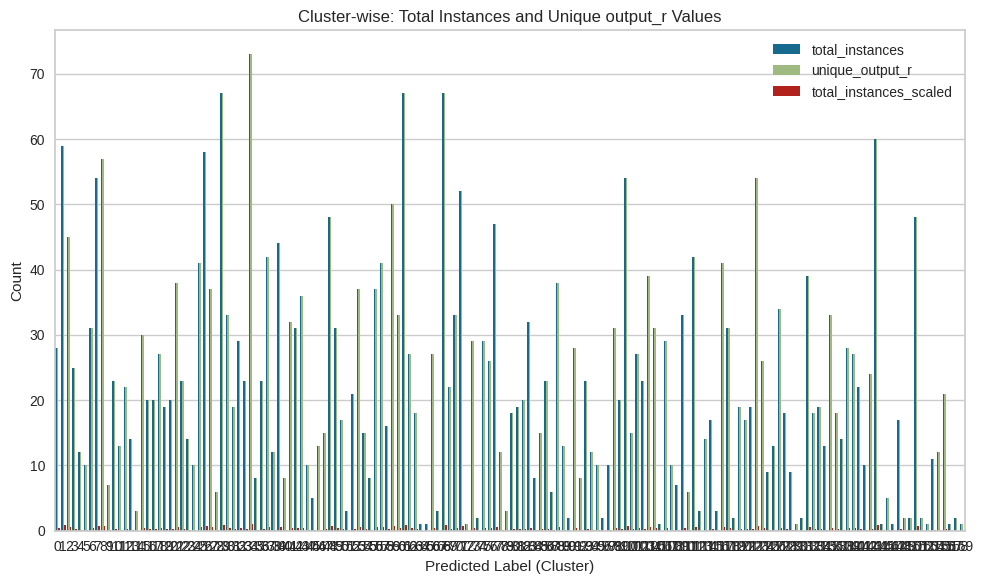

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar chart comparing total instances vs unique output_r values
plt.figure(figsize=(10, 6))
sns.barplot(data=summary.melt(id_vars='predicted_labels'), x='predicted_labels', y='value', hue='variable')
plt.title('Cluster-wise: Total Instances and Unique output_r Values')
plt.xlabel('Predicted Label (Cluster)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='')
plt.tight_layout()
plt.show()


/tmp/ipykernel_22775/4177229306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='predicted_labels', y='diversity_ratio', width=0.5, palette='viridis', order=summary.sort_values(by='diversity_ratio', ascending=False).predicted_labels)


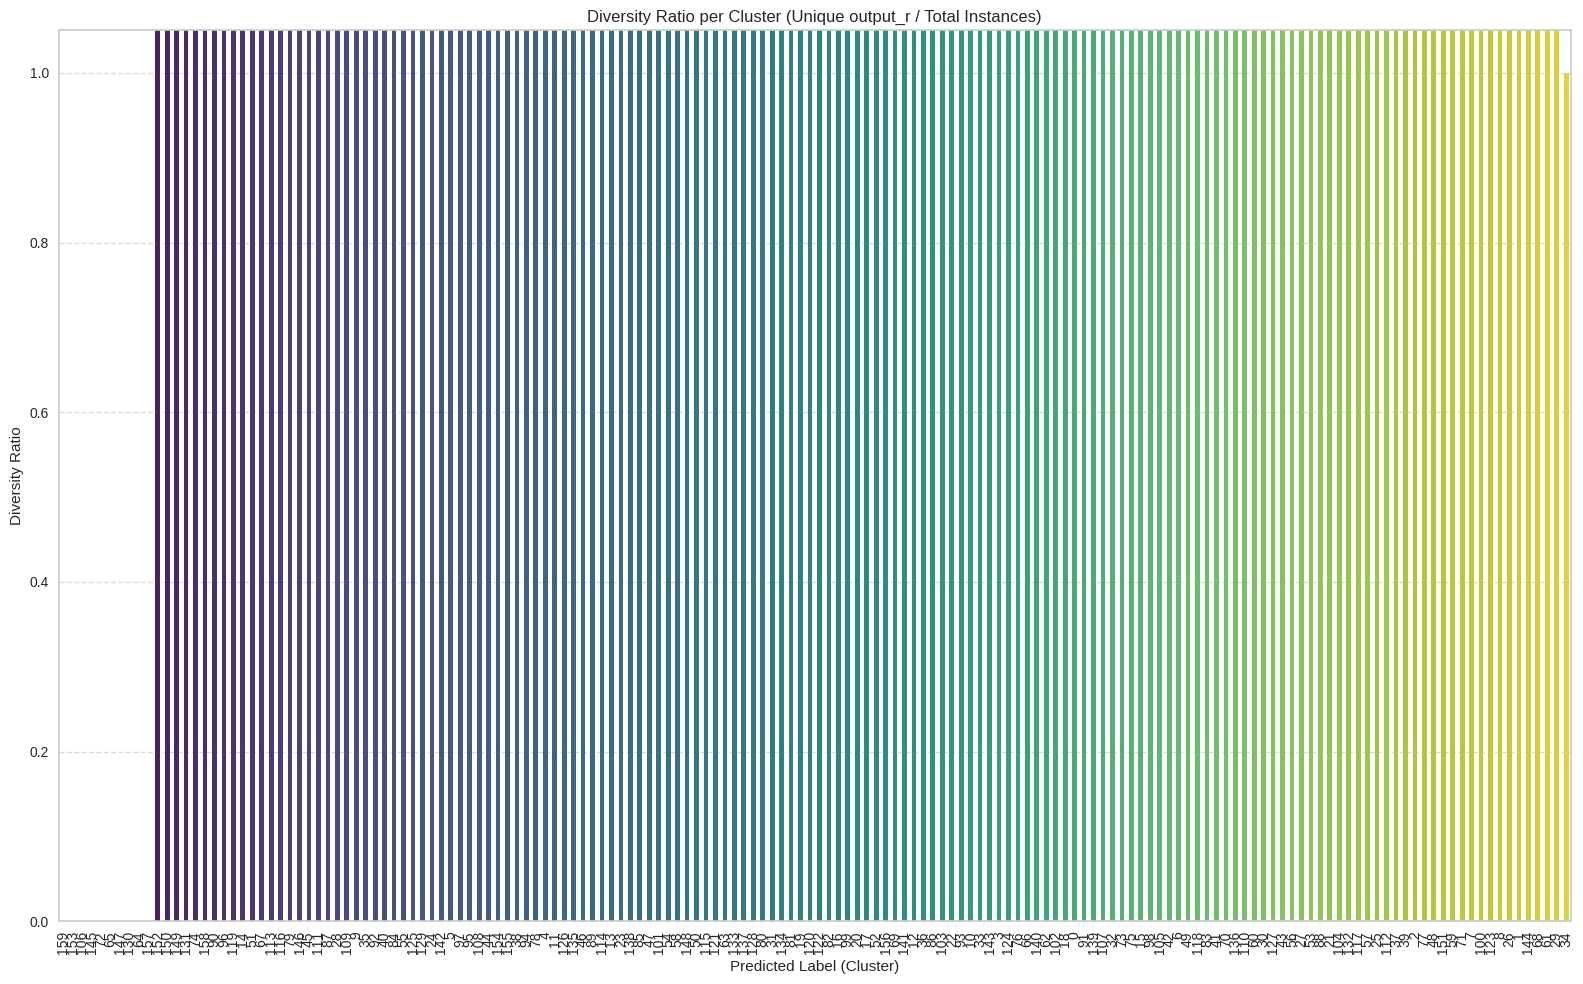

In [6]:
summary['diversity_ratio'] = (summary['unique_output_r'] / summary['total_instances']) / summary["total_instances_scaled"]

summary.sort_values(by='diversity_ratio', ascending=True, inplace=True)
plt.figure(figsize=(16, 10))
sns.barplot(data=summary, x='predicted_labels', y='diversity_ratio', width=0.5, palette='viridis', order=summary.sort_values(by='diversity_ratio', ascending=False).predicted_labels)
plt.title('Diversity Ratio per Cluster (Unique output_r / Total Instances)')
plt.xlabel('Predicted Label (Cluster)')
plt.ylabel('Diversity Ratio')
plt.xticks(rotation = 90)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
summary

In [7]:
df_dataset.iloc[1397]

print(df_dataset.iloc[1397]["sent"])
print(df_dataset.iloc[1397]["r"])
print(len(df_dataset.iloc[1397]["sent"]))

for _, a in df_dataset.sample(20).iterrows():
    print(len(a["sent"]))
    

Price3 achieves simulation time of 11.66s.The comparison of the total daily simulation time for Price1, Price2, [E1] Price3 [/E1] and Price0 using GA-EED shows that Price1 achieves a simulation time of 14.23 s, Price2 achieves a simulation time of 13.80 s, [E1] Price3 [/E1] achieves a simulation time of 11.66 s while Price0 achieves a simulation time of 13.61 s. However, GA-EED achieves the lowest operational cost of US$8224.00 compared to US$8238.60 and US$8414.81 for MEED algorithm and PSO respectively.
     The relation between Price3 and simulation time of 11.66s is [MASK].
achieves
584
241
214
331
264
242
404
247
236
245
438
412
406
233
295
342
347
245
349
284
363
